In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kruskal
import scikit_posthocs as sp

%load_ext autoreload
%autoreload 2



file_name = 'ridesharing.csv'

In [2]:
df = pd.read_csv(file_name)
df = df.dropna(subset="Steps") # drop passenger agents

In [3]:
steps = df[df["Step"] == 1440]
display(steps)

,RunId,iteration,Step,num_drivers,size,waiting_time,multi_pass,seed_int,rate,total_steps,strategy,Manhattan,AgentID,Steps,IdleTime,sec_id,request_time,pickup_time,dropoff_time,shortest distance
5139,3,0,1440,1,15,NaN,True,54,10,1440,StepType.CLOSEST,0,2,1344.0,20.0,NaN,NaN,NaN,NaN,NaN
10337,0,0,1440,1,15,NaN,True,11,10,1440,StepType.CLOSEST,0,2,1344.0,24.0,NaN,NaN,NaN,NaN,NaN
15648,1,0,1440,1,15,NaN,True,11,10,1440,StepType.WAITING,0,2,1336.0,39.0,NaN,NaN,NaN,NaN,NaN
20738,6,0,1440,1,15,NaN,True,111,10,1440,StepType.CLOSEST,0,2,1316.0,51.0,NaN,NaN,NaN,NaN,NaN
25957,4,0,1440,1,15,NaN,True,54,10,1440,StepType.WAITING,0,2,1335.0,31.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5705795,749,4,1440,5,15,NaN,True,578,10,1440,StepType.QUEUE,0,6,583.0,827.0,NaN,NaN,NaN,NaN,NaN
5705796,749,4,1440,5,15,NaN,True,578,10,1440,StepType.QUEUE,0,7,568.0,842.0,NaN,NaN,NaN,NaN,NaN
5705797,749,4,1440,5,15,NaN,True,578,10,1440,StepType.QUEUE,0,8,504.0,908.0,NaN,NaN,NaN,NaN,NaN
5705798,749,4,1440,5,15,NaN,True,578,10,1440,StepType.QUEUE,0,9,466.0,950.0,NaN,NaN,NaN,NaN,NaN


In [4]:
groups = steps.groupby(["num_drivers", "strategy", "AgentID"])
steps_av = groups.mean()

agent_groups = steps_av.groupby(["num_drivers", "strategy"])
total_sum = agent_groups.sum()
display(total_sum)

RunId  iteration    Step  size  waiting_time  \
num_drivers strategy                                                          
1           StepType.CLOSEST   313.5        2.0  1440.0  15.0           0.0   
            StepType.QUEUE     315.5        2.0  1440.0  15.0           0.0   
            StepType.WAITING   314.5        2.0  1440.0  15.0           0.0   
2           StepType.CLOSEST   687.0        4.0  2880.0  30.0           0.0   
            StepType.QUEUE     691.0        4.0  2880.0  30.0           0.0   
            StepType.WAITING   689.0        4.0  2880.0  30.0           0.0   
3           StepType.CLOSEST  1120.5        6.0  4320.0  45.0           0.0   
            StepType.QUEUE    1126.5        6.0  4320.0  45.0           0.0   
            StepType.WAITING  1123.5        6.0  4320.0  45.0           0.0   
4           StepType.CLOSEST  1614.0        8.0  5760.0  60.0           0.0   
            StepType.QUEUE    1622.0        8.0  5760.0  60.0           0.0   
            StepType.WAITING  1618.0        8.0  5760.0  60.0           0.0   
5           StepType.CLOSEST  2167.5       10.0  7200.0  75.0           0.0   
            StepType.QUEUE    2177.5       10.0  7200.0  75.0           0.0   
            StepType.WAITING  2172.5       10.0  7200.0  75.0           0.0   

                              multi_pass  seed_int  rate  total_steps  \
num_drivers strategy                                                    
1           StepType.CLOSEST         1.0     225.2  10.0       1440.0   
            StepType.QUEUE           1.0     225.2  10.0       1440.0   
            StepType.WAITING         1.0     225.2  10.0       1440.0   
2           StepType.CLOSEST         2.0     450.4  20.0       2880.0   
            StepType.QUEUE           2.0     450.4  20.0       2880.0   
            StepType.WAITING         2.0     450.4  20.0       2880.0   
3           StepType.CLOSEST         3.0     675.6  30.0       4320.0   
            StepType.QUEUE           3.0     675.6  30.0       4320.0   
            StepType.WAITING         3.0     675.6  30.0       4320.0   
4           StepType.CLOSEST         4.0     900.8  40.0       5760.0   
            StepType.QUEUE           4.0     900.8  40.0       5760.0   
            StepType.WAITING         4.0     900.8  40.0       5760.0   
5           StepType.CLOSEST         5.0    1126.0  50.0       7200.0   
            StepType.QUEUE           5.0    1126.0  50.0       7200.0   
            StepType.WAITING         5.0    1126.0  50.0       7200.0   

                              Manhattan    Steps  IdleTime  sec_id  \
num_drivers strategy                                                 
1           StepType.CLOSEST        0.0  1333.90     32.60     0.0   
            StepType.QUEUE          0.0  1340.84     29.04     0.0   
            StepType.WAITING        0.0  1335.52     34.30     0.0   
2           StepType.CLOSEST        0.0  2341.16    415.86     0.0   
            StepType.QUEUE          0.0  2327.50    430.44     0.0   
            StepType.WAITING        0.0  2338.12    419.64     0.0   
3           StepType.CLOSEST        0.0  2581.58   1602.42     0.0   
            StepType.QUEUE          0.0  2568.84   1615.08     0.0   
            StepType.WAITING        0.0  2589.24   1594.72     0.0   
4           StepType.CLOSEST        0.0  2623.20   2997.74     0.0   
            StepType.QUEUE          0.0  2609.54   3011.66     0.0   
            StepType.WAITING        0.0  2606.84   3014.56     0.0   
5           StepType.CLOSEST        0.0  2629.92   4429.10     0.0   
            StepType.QUEUE          0.0  2614.70   4444.72     0.0   
            StepType.WAITING        0.0  2629.26   4430.32     0.0   

                              request_time  pickup_time  dropoff_time  \
num_drivers strategy                                                    
1           StepType.CLOSEST           0.0          0.0           0.0   
            StepType.QUEUE         

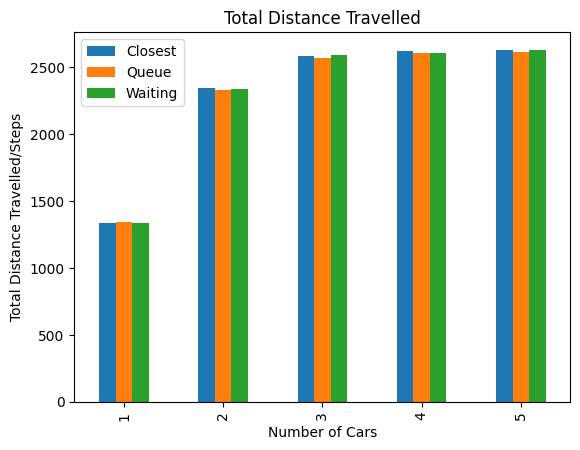

In [16]:
unstacked = total_sum.unstack()


ax = unstacked["Steps"].plot(kind="bar", stacked=False)
ax.legend(['Closest', 'Queue', "Waiting"])



plt.xlabel('Number of Cars')
plt.ylabel('Total Distance Travelled/Steps')
plt.title('Total Distance Travelled')
plt.savefig('figures/total_steps.png')


## Stats Testing

In [6]:
norm = pd.DataFrame(columns=['Strategy', 'num_drivers', 'Iteration', 'Seed_int', 'steps'])

for strategy in ["StepType.CLOSEST", "StepType.QUEUE", "StepType.WAITING"]:
    for i in range(1,6):
        for seed_int in steps['seed_int'].unique():
            for iteration in steps['iteration'].unique():
                distance = steps[(steps["strategy"] == strategy) & (steps["num_drivers"] == i) & (steps['seed_int'] == seed_int) & (steps['iteration'] == iteration)]
                # print(distance['Steps'])
                total_steps = distance['Steps'].sum()
                # print(total_steps)
                
                norm.loc[len(norm)] = {'Strategy': strategy, 'num_drivers': i, 'Iteration': iteration, 'Seed_int': seed_int, 'steps': total_steps}



norm
# unique_fulfilled

,Strategy,num_drivers,Iteration,Seed_int,steps
0,StepType.CLOSEST,1,0,54,1344.0
1,StepType.CLOSEST,1,1,54,1304.0
2,StepType.CLOSEST,1,2,54,1333.0
3,StepType.CLOSEST,1,3,54,1332.0
4,StepType.CLOSEST,1,4,54,1352.0
...,...,...,...,...,...
745,StepType.WAITING,5,0,578,2693.0
746,StepType.WAITING,5,1,578,2537.0
747,StepType.WAITING,5,2,578,2520.0
748,StepType.WAITING,5,3,578,2618.0


In [7]:
for strategy in ["StepType.CLOSEST", "StepType.QUEUE", "StepType.WAITING"]:
    for i in range(1,6):
        group = norm[(norm["Strategy"] == strategy) & (norm["num_drivers"] == i)]

        
        stat, p = shapiro(group["steps"])

        # Print the test statistic and p-value
        print("Shapiro-Wilk test statistic:", stat)
        print("p-value:", p)
        if p < 0.05:
            print("Reject", strategy, i)

Shapiro-Wilk test statistic: 0.9302838444709778
p-value: 0.005664351396262646
Reject StepType.CLOSEST 1
Shapiro-Wilk test statistic: 0.976647675037384
p-value: 0.4207962453365326
Shapiro-Wilk test statistic: 0.9780157804489136
p-value: 0.47165611386299133
Shapiro-Wilk test statistic: 0.9723227620124817
p-value: 0.28698280453681946
Shapiro-Wilk test statistic: 0.9659908413887024
p-value: 0.15827196836471558
Shapiro-Wilk test statistic: 0.8768575191497803
p-value: 8.995748066809028e-05
Reject StepType.QUEUE 1
Shapiro-Wilk test statistic: 0.977165162563324
p-value: 0.43956610560417175
Shapiro-Wilk test statistic: 0.9807798266410828
p-value: 0.5852891206741333
Shapiro-Wilk test statistic: 0.9570714831352234
p-value: 0.06702927500009537
Shapiro-Wilk test statistic: 0.977931022644043
p-value: 0.4683918356895447
Shapiro-Wilk test statistic: 0.9248507022857666
p-value: 0.0035466253757476807
Reject StepType.WAITING 1
Shapiro-Wilk test statistic: 0.9781832098960876
p-value: 0.47814661264419556
S

In [8]:
# not normal, so use kruskal 

for i in range(1,6):
    group1 = norm[(norm["Strategy"] == "StepType.CLOSEST") & (norm["num_drivers"] == i)]['steps']
    group2 = norm[(norm["Strategy"] == "StepType.QUEUE") & (norm["num_drivers"] == i)]['steps']
    group3 = norm[(norm["Strategy"] == "StepType.WAITING") & (norm["num_drivers"] == i)]['steps']

    stat, p = kruskal(group1, group2, group3)

    print('Statistics=%.3f, p=%f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Samples look to be drawn from the same distributions (fail to reject H0)')
    else:
        print('Samples look to be drawn from different distributions (reject H0)')

Statistics=5.295, p=0.070819
Samples look to be drawn from the same distributions (fail to reject H0)
Statistics=1.457, p=0.482541
Samples look to be drawn from the same distributions (fail to reject H0)
Statistics=0.920, p=0.631296
Samples look to be drawn from the same distributions (fail to reject H0)
Statistics=1.346, p=0.510250
Samples look to be drawn from the same distributions (fail to reject H0)
Statistics=0.893, p=0.639741
Samples look to be drawn from the same distributions (fail to reject H0)


In [9]:
# posthoc analysus - pairwise t test use dunns test for non-parametric data
data = norm[(norm["num_drivers"] == 1)]



p_values= sp.posthoc_dunn(data,val_col='steps', group_col='Strategy', p_adjust = 'bonferroni')
 
print(p_values)


# # perform post-hoc Dunn's test with Bonferroni correction
# groups = np.concatenate((np.repeat('group1', 20), np.repeat('group2', 20), np.repeat('group3', 20)))
# data = pd.DataFrame({'value': np.concatenate((group1, group2, group3)), 'group': groups})

# dunn_results = posthoc_dunn(data, val_col='value', group_col='group', p_adjust='bonferroni')
# print(dunn_results).


                  StepType.CLOSEST  StepType.QUEUE  StepType.WAITING
StepType.CLOSEST          1.000000        0.076572          1.000000
StepType.QUEUE            0.076572        1.000000          0.330965
StepType.WAITING          1.000000        0.330965          1.000000
